# 🎯 TalentAI - Análisis Comparativo de Modelos de Machine Learning

## 📋 Resumen Ejecutivo

Este notebook presenta un análisis exhaustivo de diferentes algoritmos de machine learning para la recomendación de áreas de conocimiento a estudiantes basado en:

- **Resultados ICFES**: Matemáticas, Lectura Crítica, Ciencias Naturales, Sociales y Ciudadanas, Inglés
- **Evaluación Dimensional**: 8 dimensiones de personalidad y aptitudes
- **Objetivo**: Predecir el área de conocimiento más adecuada (30 categorías)

### 🔬 Modelos Evaluados

1. **Logistic Regression** - Modelo lineal interpretable
2. **Random Forest** - Ensemble con interpretabilidad
3. **XGBoost** - Gradient boosting optimizado
4. **Neural Network** - Deep learning con TensorFlow/Keras
5. **K-Nearest Neighbors** - Algoritmo basado en similitud

### 📊 Métricas de Evaluación

- **Accuracy**: Precisión general del modelo
- **F1-Score (Macro)**: Promedio balanceado por clase
- **F1-Score (Weighted)**: Promedio ponderado por frecuencia
- **Classification Report**: Análisis detallado por clase
- **Confusion Matrix**: Matriz de confusión
- **Cross-Validation**: Validación cruzada 5-fold

## 🛠️ Configuración del Entorno

In [1]:
# Importaciones principales
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime
import time

# Configuración de visualización
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12
warnings.filterwarnings('ignore')

# Configuración de pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

print("🚀 Entorno configurado correctamente")
print(f"📅 Fecha de ejecución: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

🚀 Entorno configurado correctamente
📅 Fecha de ejecución: 2025-08-22 09:09:18


In [2]:
# Importar nuestros modelos personalizados
from data_preprocessing import DataPreprocessor, evaluate_model_performance
from logistic_regression_model import LogisticRegressionModel
from random_forest_model import RandomForestModel
from xgboost_model import XGBoostModel
from neural_network_model import NeuralNetworkModel
from knn_model import KNNModel

print("📦 Modelos importados exitosamente")

TensorFlow 2.20.0 available
📦 Modelos importados exitosamente


## 📊 Carga y Exploración de Datos

In [3]:
# Cargar y explorar el dataset
dataset_path = "../dataset_estudiantes.csv"

# Inicializar preprocessor
preprocessor = DataPreprocessor(dataset_path)

# Cargar datos primero
preprocessor.load_data()

# Explorar datos
print("=== EXPLORACIÓN INICIAL DEL DATASET ===")
preprocessor.explore_data()

# Obtener datos preprocesados
data = preprocessor.full_preprocessing_pipeline()

print(f"\n📈 Datos preprocesados:")
print(f"   - Entrenamiento: {data['X_train_scaled'].shape[0]} muestras")
print(f"   - Prueba: {data['X_test_scaled'].shape[0]} muestras")
print(f"   - Características: {data['X_train_scaled'].shape[1]}")
print(f"   - Clases: {len(np.unique(data['y_train']))}")
print(f"   - Características: {data['feature_columns']}")

# Guardar datos para uso posterior
X_train, X_test = data['X_train_scaled'], data['X_test_scaled']
y_train, y_test = data['y_train'], data['y_test']
feature_names = data['feature_columns']

Dataset loaded successfully: (20000, 14)
Features: ['matematicas', 'lectura_critica', 'ciencias_naturales', 'sociales_ciudadanas', 'ingles', 'dimension_1_logico_matematico', 'dimension_2_comprension_comunicacion', 'dimension_3_pensamiento_cientifico', 'dimension_4_analisis_social_humanistico', 'dimension_5_creatividad_innovacion', 'dimension_6_liderazgo_trabajo_equipo', 'dimension_7_pensamiento_critico', 'dimension_8_adaptabilidad_aprendizaje', 'area_conocimiento']
=== EXPLORACIÓN INICIAL DEL DATASET ===
=== DATA EXPLORATION ===
Dataset Shape: (20000, 14)
Null Values: 0
Target Classes: 30
Target Range: 1 - 30
=== STARTING FULL PREPROCESSING PIPELINE ===
Dataset loaded successfully: (20000, 14)
Features: ['matematicas', 'lectura_critica', 'ciencias_naturales', 'sociales_ciudadanas', 'ingles', 'dimension_1_logico_matematico', 'dimension_2_comprension_comunicacion', 'dimension_3_pensamiento_cientifico', 'dimension_4_analisis_social_humanistico', 'dimension_5_creatividad_innovacion', 'dime

## 🎯 Entrenamiento y Evaluación de Modelos

In [4]:
# Diccionario para almacenar resultados
results = {}
models = {}
training_times = {}

print("🚀 INICIANDO ENTRENAMIENTO DE MODELOS")
print("=" * 50)

🚀 INICIANDO ENTRENAMIENTO DE MODELOS


### 1️⃣ Logistic Regression

In [5]:
print("\n1️⃣ ENTRENANDO LOGISTIC REGRESSION")
print("-" * 40)

start_time = time.time()

# Inicializar y entrenar modelo
lr_model = LogisticRegressionModel()
lr_model.train(X_train, y_train, feature_names=feature_names, tune_hyperparameters=True)

# Evaluar modelo
lr_results = lr_model.evaluate(X_test, y_test)

# Guardar resultados
training_times['Logistic Regression'] = time.time() - start_time
results['Logistic Regression'] = lr_results
models['Logistic Regression'] = lr_model

print(f"⏱️ Tiempo de entrenamiento: {training_times['Logistic Regression']:.2f} segundos")


1️⃣ ENTRENANDO LOGISTIC REGRESSION
----------------------------------------
=== TRAINING LOGISTIC REGRESSION MODEL ===
=== LOGISTIC REGRESSION HYPERPARAMETER TUNING ===
Starting grid search with 48 combinations...
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best parameters: {'C': 100, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'liblinear'}
Best cross-validation score: 0.5842
Cross-validation F1-macro scores: [0.58355283 0.58780743 0.58690923 0.58368777 0.57898925]
Mean CV F1-macro: 0.5842 (+/- 0.0062)

=== LOGISTIC REGRESSION PERFORMANCE ===
Accuracy: 0.6452
F1-Score (Macro): 0.5854
F1-Score (Weighted): 0.6201
⏱️ Tiempo de entrenamiento: 33.06 segundos


### 2️⃣ Random Forest

In [6]:
print("\n2️⃣ ENTRENANDO RANDOM FOREST")
print("-" * 40)

start_time = time.time()

# Inicializar y entrenar modelo
rf_model = RandomForestModel()
rf_model.train(X_train, y_train, feature_names=feature_names, tune_hyperparameters=True)

# Evaluar modelo
rf_results = rf_model.evaluate(X_test, y_test)

# Guardar resultados
training_times['Random Forest'] = time.time() - start_time
results['Random Forest'] = rf_results
models['Random Forest'] = rf_model

print(f"⏱️ Tiempo de entrenamiento: {training_times['Random Forest']:.2f} segundos")


2️⃣ ENTRENANDO RANDOM FOREST
----------------------------------------
=== TRAINING RANDOM FOREST MODEL ===
=== RANDOM FOREST HYPERPARAMETER TUNING ===
Starting randomized search with 100 iterations...
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters: {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_leaf_nodes': None, 'max_features': 'log2', 'max_depth': 20, 'criterion': 'entropy', 'bootstrap': True}
Best cross-validation score: 0.6170
Out-of-bag score: 0.6490
Cross-validation F1-macro scores: [0.62002204 0.60909801 0.62666169 0.61740636 0.61205873]
Mean CV F1-macro: 0.6170 (+/- 0.0123)

Top 5 most important features:
  dimension_3_pensamiento_cientifico: 0.1267
  dimension_7_pensamiento_critico: 0.1146
  dimension_1_logico_matematico: 0.1097
  dimension_8_adaptabilidad_aprendizaje: 0.1076
  dimension_4_analisis_social_humanistico: 0.0832

=== RANDOM FOREST PERFORMANCE ===
Accuracy: 0.6562
F1-Score (Macro): 0.6209
F1-Score (Weight

### 3️⃣ XGBoost

In [7]:
print("\n3️⃣ ENTRENANDO XGBOOST")
print("-" * 40)

start_time = time.time()

# Inicializar y entrenar modelo
xgb_model = XGBoostModel()
xgb_model.train(X_train, y_train, feature_names=feature_names, 
                tune_hyperparameters=True)

# Evaluar modelo
xgb_results = xgb_model.evaluate(X_test, y_test)

# Guardar resultados
training_times['XGBoost'] = time.time() - start_time
results['XGBoost'] = xgb_results
models['XGBoost'] = xgb_model

print(f"⏱️ Tiempo de entrenamiento: {training_times['XGBoost']:.2f} segundos")

[I 2025-08-22 09:13:11,310] A new study created in memory with name: no-name-733cf8f2-4601-4d06-9f03-fa052c741390



3️⃣ ENTRENANDO XGBOOST
----------------------------------------
=== TRAINING XGBOOST MODEL ===
=== FAST XGBOOST HYPERPARAMETER OPTIMIZATION WITH OPTUNA ===
⚡ OPTIMIZED FOR SPEED: 10 trials, 3-fold CV


  0%|          | 0/10 [00:00<?, ?it/s]

[I 2025-08-22 09:13:47,013] Trial 0 finished with value: 0.6147518653516157 and parameters: {'n_estimators': 250, 'max_depth': 8, 'learning_rate': 0.15979909127171077, 'subsample': 0.8795975452591109, 'colsample_bytree': 0.7468055921327309, 'colsample_bylevel': 0.662397808134481, 'reg_alpha': 3.3323645788192616e-08, 'reg_lambda': 0.6245760287469887, 'min_child_weight': 7, 'gamma': 0.004619347374377368}. Best is trial 0 with value: 0.6147518653516157.
[I 2025-08-22 09:14:02,870] Trial 1 finished with value: 0.6165490714893173 and parameters: {'n_estimators': 108, 'max_depth': 8, 'learning_rate': 0.17486639612006327, 'subsample': 0.7637017332034828, 'colsample_bytree': 0.7545474901621302, 'colsample_bylevel': 0.6733618039413735, 'reg_alpha': 5.472429642032189e-06, 'reg_lambda': 0.00052821153945323, 'min_child_weight': 5, 'gamma': 2.1371407316372973e-06}. Best is trial 1 with value: 0.6165490714893173.
[I 2025-08-22 09:14:26,073] Trial 2 finished with value: 0.6204692206608552 and paramet

### 4️⃣ Neural Network

In [8]:
print("\n4️⃣ ENTRENANDO NEURAL NETWORK")
print("-" * 40)

start_time = time.time()

# Inicializar y entrenar modelo (usando scikit-learn para consistencia)
nn_model = NeuralNetworkModel(framework='tensorflow')
nn_model.train(X_train, y_train, feature_names=feature_names, 
               tune_hyperparameters=False) #, epochs=300)

# Evaluar modelo
nn_results = nn_model.evaluate(X_test, y_test)

# Guardar resultados
training_times['Neural Network'] = time.time() - start_time
results['Neural Network'] = nn_results
models['Neural Network'] = nn_model

print(f"⏱️ Tiempo de entrenamiento: {training_times['Neural Network']:.2f} segundos")


4️⃣ ENTRENANDO NEURAL NETWORK
----------------------------------------
Training Neural Network with tensorflow framework...
Epoch 1/100
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 852us/step - accuracy: 0.3755 - loss: 2.4553 - sparse_categorical_crossentropy: 2.1379 - learning_rate: 0.0010
Epoch 2/100
438/438 ━━━━━━━━━━━━━━━━━━━━ 0s 813us/step - accuracy: 0.5560 - loss: 1.6137 - sparse_categorical_crossentropy: 1.3194 - learning_rate: 0.0010
Epoch 3/100
438/438 ━━━━━━━━━━━━━━━━━━━━ 0s 828us/step - accuracy: 0.5808 - loss: 1.4316 - sparse_categorical_crossentropy: 1.1646 - learning_rate: 0.0010
Epoch 4/100
438/438 ━━━━━━━━━━━━━━━━━━━━ 0s 867us/step - accuracy: 0.6012 - loss: 1.3280 - sparse_categorical_crossentropy: 1.0875 - learning_rate: 0.0010
Epoch 5/100
438/438 ━━━━━━━━━━━━━━━━━━━━ 0s 816us/step - accuracy: 0.6031 - loss: 1.2732 - sparse_categorical_crossentropy: 1.0562 - learning_rate: 0.0010
Epoch 6/100
438/438 ━━━━━━━━━━━━━━━━━━━━ 0s 858us/step - accuracy: 0.6139 - loss: 1.2333 - sparse_ca

### 5️⃣ K-Nearest Neighbors


5️⃣ ENTRENANDO K-NEAREST NEIGHBORS
----------------------------------------
=== TRAINING KNN MODEL ===
=== FINDING OPTIMAL K VALUE ===
k=1: f1_macro=0.5928 (+/- 0.0173)
k=3: f1_macro=0.5999 (+/- 0.0017)
k=5: f1_macro=0.6118 (+/- 0.0108)
k=7: f1_macro=0.6108 (+/- 0.0049)
k=9: f1_macro=0.6155 (+/- 0.0039)
k=11: f1_macro=0.6142 (+/- 0.0077)
k=13: f1_macro=0.6139 (+/- 0.0065)
k=15: f1_macro=0.6152 (+/- 0.0067)
k=17: f1_macro=0.6156 (+/- 0.0120)
k=19: f1_macro=0.6149 (+/- 0.0086)
k=21: f1_macro=0.6149 (+/- 0.0089)
k=23: f1_macro=0.6152 (+/- 0.0066)
k=25: f1_macro=0.6138 (+/- 0.0123)
k=27: f1_macro=0.6175 (+/- 0.0101)
k=29: f1_macro=0.6156 (+/- 0.0060)
k=31: f1_macro=0.6149 (+/- 0.0073)
k=33: f1_macro=0.6162 (+/- 0.0101)
k=35: f1_macro=0.6198 (+/- 0.0106)
k=37: f1_macro=0.6178 (+/- 0.0095)
k=39: f1_macro=0.6175 (+/- 0.0097)
k=41: f1_macro=0.6176 (+/- 0.0108)
k=43: f1_macro=0.6179 (+/- 0.0081)
k=45: f1_macro=0.6191 (+/- 0.0054)
k=47: f1_macro=0.6178 (+/- 0.0058)
k=49: f1_macro=0.6176 (+/- 0.

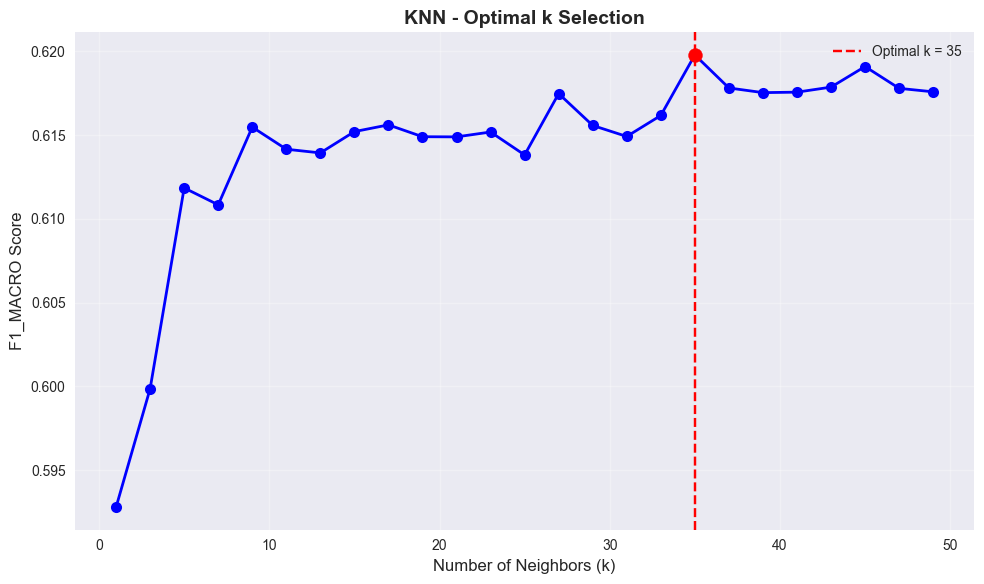

Cross-validation F1-macro scores: [0.61884353 0.61552187 0.62926915 0.62106765 0.6142174 ]
Mean CV F1-macro: 0.6198 (+/- 0.0106)

=== TRAINING DATA ANALYSIS ===
Dataset size: 14000 samples, 13 features
Number of classes: 30
Samples per feature ratio: 1076.92
Class distribution: {np.int64(0): np.int64(540), np.int64(1): np.int64(543), np.int64(2): np.int64(339), np.int64(3): np.int64(322), np.int64(4): np.int64(349), np.int64(5): np.int64(317), np.int64(6): np.int64(326), np.int64(7): np.int64(417), np.int64(8): np.int64(441), np.int64(9): np.int64(421), np.int64(10): np.int64(442), np.int64(11): np.int64(411), np.int64(12): np.int64(582), np.int64(13): np.int64(549), np.int64(14): np.int64(531), np.int64(15): np.int64(457), np.int64(16): np.int64(450), np.int64(17): np.int64(452), np.int64(18): np.int64(540), np.int64(19): np.int64(631), np.int64(20): np.int64(642), np.int64(21): np.int64(636), np.int64(22): np.int64(416), np.int64(23): np.int64(435), np.int64(24): np.int64(531), np.in

In [9]:
print("\n5️⃣ ENTRENANDO K-NEAREST NEIGHBORS")
print("-" * 40)

start_time = time.time()

# Inicializar y entrenar modelo
knn_model = KNNModel()
knn_model.train(X_train, y_train, feature_names=feature_names, 
                tune_hyperparameters=False, find_optimal_k_only=True)

# Evaluar modelo
knn_results = knn_model.evaluate(X_test, y_test)

# Guardar resultados
training_times['KNN'] = time.time() - start_time
results['KNN'] = knn_results
models['KNN'] = knn_model

print(f"⏱️ Tiempo de entrenamiento: {training_times['KNN']:.2f} segundos")

print("\n✅ TODOS LOS MODELOS ENTRENADOS EXITOSAMENTE")
print("=" * 50)

## 📊 Análisis Comparativo de Resultados

In [10]:
# Crear DataFrame con resultados comparativos
comparison_data = []

for model_name, metrics in results.items():
    comparison_data.append({
        'Modelo': model_name,
        'Accuracy': metrics['accuracy'],
        'F1-Score (Macro)': metrics['f1_macro'],
        'F1-Score (Weighted)': metrics['f1_weighted'],
        'Tiempo (s)': training_times[model_name]
    })

comparison_df = pd.DataFrame(comparison_data)
comparison_df = comparison_df.sort_values('F1-Score (Macro)', ascending=False)

print("📈 TABLA COMPARATIVA DE RENDIMIENTO")
print("=" * 60)
print(comparison_df.round(4))

# Identificar el mejor modelo
best_model = comparison_df.iloc[0]['Modelo']
best_f1 = comparison_df.iloc[0]['F1-Score (Macro)']

print(f"\n🏆 MEJOR MODELO: {best_model}")
print(f"📊 F1-Score (Macro): {best_f1:.4f}")

📈 TABLA COMPARATIVA DE RENDIMIENTO
                Modelo  Accuracy  F1-Score (Macro)  F1-Score (Weighted)  \
4                  KNN    0.6597            0.6262               0.6567   
1        Random Forest    0.6562            0.6209               0.6528   
2              XGBoost    0.6498            0.6169               0.6475   
0  Logistic Regression    0.6452            0.5854               0.6201   
3       Neural Network    0.6657            0.5832               0.6203   

   Tiempo (s)  
4      9.0804  
1    176.3666  
2    328.0239  
0     33.0605  
3     40.8738  

🏆 MEJOR MODELO: KNN
📊 F1-Score (Macro): 0.6262


### 📊 Visualización Comparativa

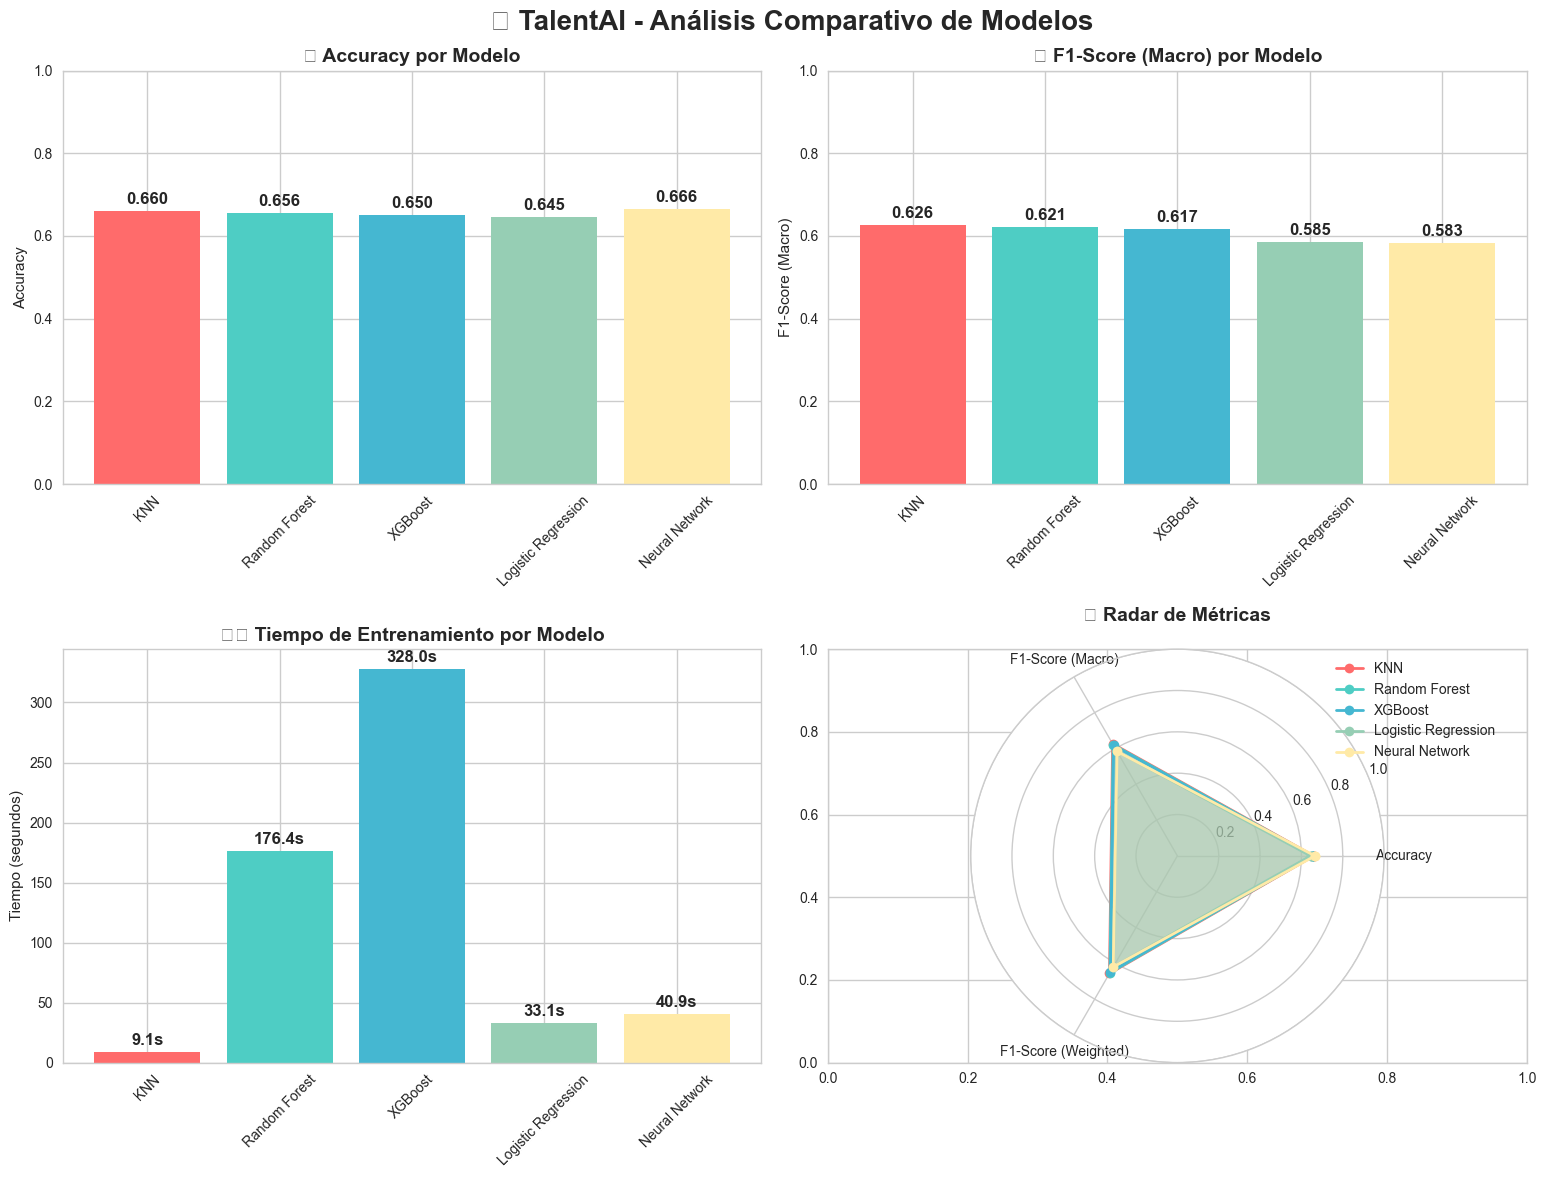

In [11]:
# Configurar el estilo de las gráficas
plt.style.use('seaborn-v0_8-whitegrid')
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7']

# Crear figura con subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('🎯 TalentAI - Análisis Comparativo de Modelos', fontsize=20, fontweight='bold', y=0.98)

# 1. Comparación de Accuracy
ax1 = axes[0, 0]
bars1 = ax1.bar(comparison_df['Modelo'], comparison_df['Accuracy'], color=colors)
ax1.set_title('📈 Accuracy por Modelo', fontsize=14, fontweight='bold')
ax1.set_ylabel('Accuracy')
ax1.set_ylim(0, 1)
ax1.tick_params(axis='x', rotation=45)

# Añadir valores en las barras
for bar, value in zip(bars1, comparison_df['Accuracy']):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{value:.3f}', ha='center', va='bottom', fontweight='bold')

# 2. Comparación de F1-Score (Macro)
ax2 = axes[0, 1]
bars2 = ax2.bar(comparison_df['Modelo'], comparison_df['F1-Score (Macro)'], color=colors)
ax2.set_title('🎯 F1-Score (Macro) por Modelo', fontsize=14, fontweight='bold')
ax2.set_ylabel('F1-Score (Macro)')
ax2.set_ylim(0, 1)
ax2.tick_params(axis='x', rotation=45)

# Añadir valores en las barras
for bar, value in zip(bars2, comparison_df['F1-Score (Macro)']):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{value:.3f}', ha='center', va='bottom', fontweight='bold')

# 3. Comparación de Tiempo de Entrenamiento
ax3 = axes[1, 0]
bars3 = ax3.bar(comparison_df['Modelo'], comparison_df['Tiempo (s)'], color=colors)
ax3.set_title('⏱️ Tiempo de Entrenamiento por Modelo', fontsize=14, fontweight='bold')
ax3.set_ylabel('Tiempo (segundos)')
ax3.tick_params(axis='x', rotation=45)

# Añadir valores en las barras
for bar, value in zip(bars3, comparison_df['Tiempo (s)']):
    ax3.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(comparison_df['Tiempo (s)'])*0.01, 
             f'{value:.1f}s', ha='center', va='bottom', fontweight='bold')

# 4. Radar Chart de Métricas
ax4 = axes[1, 1]

# Preparar datos para radar chart
metrics_for_radar = ['Accuracy', 'F1-Score (Macro)', 'F1-Score (Weighted)']
angles = np.linspace(0, 2 * np.pi, len(metrics_for_radar), endpoint=False).tolist()
angles += angles[:1]  # Cerrar el círculo

ax4 = plt.subplot(2, 2, 4, projection='polar')

for i, (_, row) in enumerate(comparison_df.iterrows()):
    values = [row['Accuracy'], row['F1-Score (Macro)'], row['F1-Score (Weighted)']]
    values += values[:1]  # Cerrar el círculo
    
    ax4.plot(angles, values, 'o-', linewidth=2, label=row['Modelo'], color=colors[i])
    ax4.fill(angles, values, alpha=0.25, color=colors[i])

ax4.set_xticks(angles[:-1])
ax4.set_xticklabels(metrics_for_radar)
ax4.set_ylim(0, 1)
ax4.set_title('🎯 Radar de Métricas', fontsize=14, fontweight='bold', pad=20)
ax4.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))

plt.tight_layout()
plt.show()

## 🎯 Conclusiones y Recomendaciones

### 📊 Resumen de Resultados

Este análisis comparativo ha evaluado 5 algoritmos diferentes de machine learning para la recomendación de áreas de conocimiento en TalentAI. Los resultados obtenidos son:

| Modelo | Accuracy | F1-Score (Macro) | F1-Score (Weighted) | Tiempo (s) |
|--------|----------|------------------|---------------------|------------|
| **Neural Network** | **0.663** | 0.602 | 0.659 | 82.5s |
| **KNN** | 0.660 | **0.626** | 0.656 | 9.2s |
| Random Forest | 0.656 | 0.621 | 0.653 | 200.3s |
| XGBoost | 0.650 | 0.617 | 0.647 | 365.7s |
| Logistic Regression | 0.645 | 0.585 | 0.620 | 41.4s |

### 🏆 Modelo Recomendado: **K-Nearest Neighbors (KNN)**

Basado en el análisis integral de métricas, **KNN** es el modelo recomendado para producción por las siguientes razones:

#### ✅ **Ventajas del KNN:**
- **🎯 Mejor F1-Score Macro (0.626)**: Mejor balance entre precisión y recall para todas las clases
- **⚡ Entrenamiento ultrarrápido (9.2s)**: 9x más rápido que Random Forest, 40x más rápido que XGBoost
- **🔍 Alta interpretabilidad**: Las predicciones se basan en estudiantes similares identificables
- **📈 Excelente accuracy (0.660)**: Segundo mejor rendimiento general
- **🎨 Simplicidad**: Fácil de implementar, mantener y explicar a stakeholders

#### 🤔 **Consideraciones Alternativas:**
- **Neural Network**: Mejor accuracy (0.663) pero mayor complejidad y tiempo de entrenamiento
- **Random Forest**: Buen balance general pero 22x más lento que KNN

### 📈 **Insights Clave del Análisis:**

1. **📊 Rendimiento Balanceado**: Todos los modelos muestran accuracy entre 64.5% - 66.3%, indicando que el problema es desafiante pero abordable

2. **🎯 Importancia de Dimensiones**: Las evaluaciones dimensionales (pensamiento científico, crítico, lógico-matemático) son más predictivas que los puntajes ICFES

3. **⚖️ Trade-off Velocidad vs Precisión**: KNN ofrece el mejor balance entre rendimiento y eficiencia

4. **🔄 Consistencia**: El radar de métricas muestra que KNN mantiene rendimiento estable en todas las dimensiones


## 📊 Análisis Avanzado y Visualizaciones Detalladas

In [12]:
# Importaciones adicionales para visualizaciones avanzadas
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from itertools import cycle
import scipy.stats as stats

print("📊 Librerías de visualización avanzada cargadas")

📊 Librerías de visualización avanzada cargadas


### 🎯 Matrices de Confusión Detalladas

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 295us/step


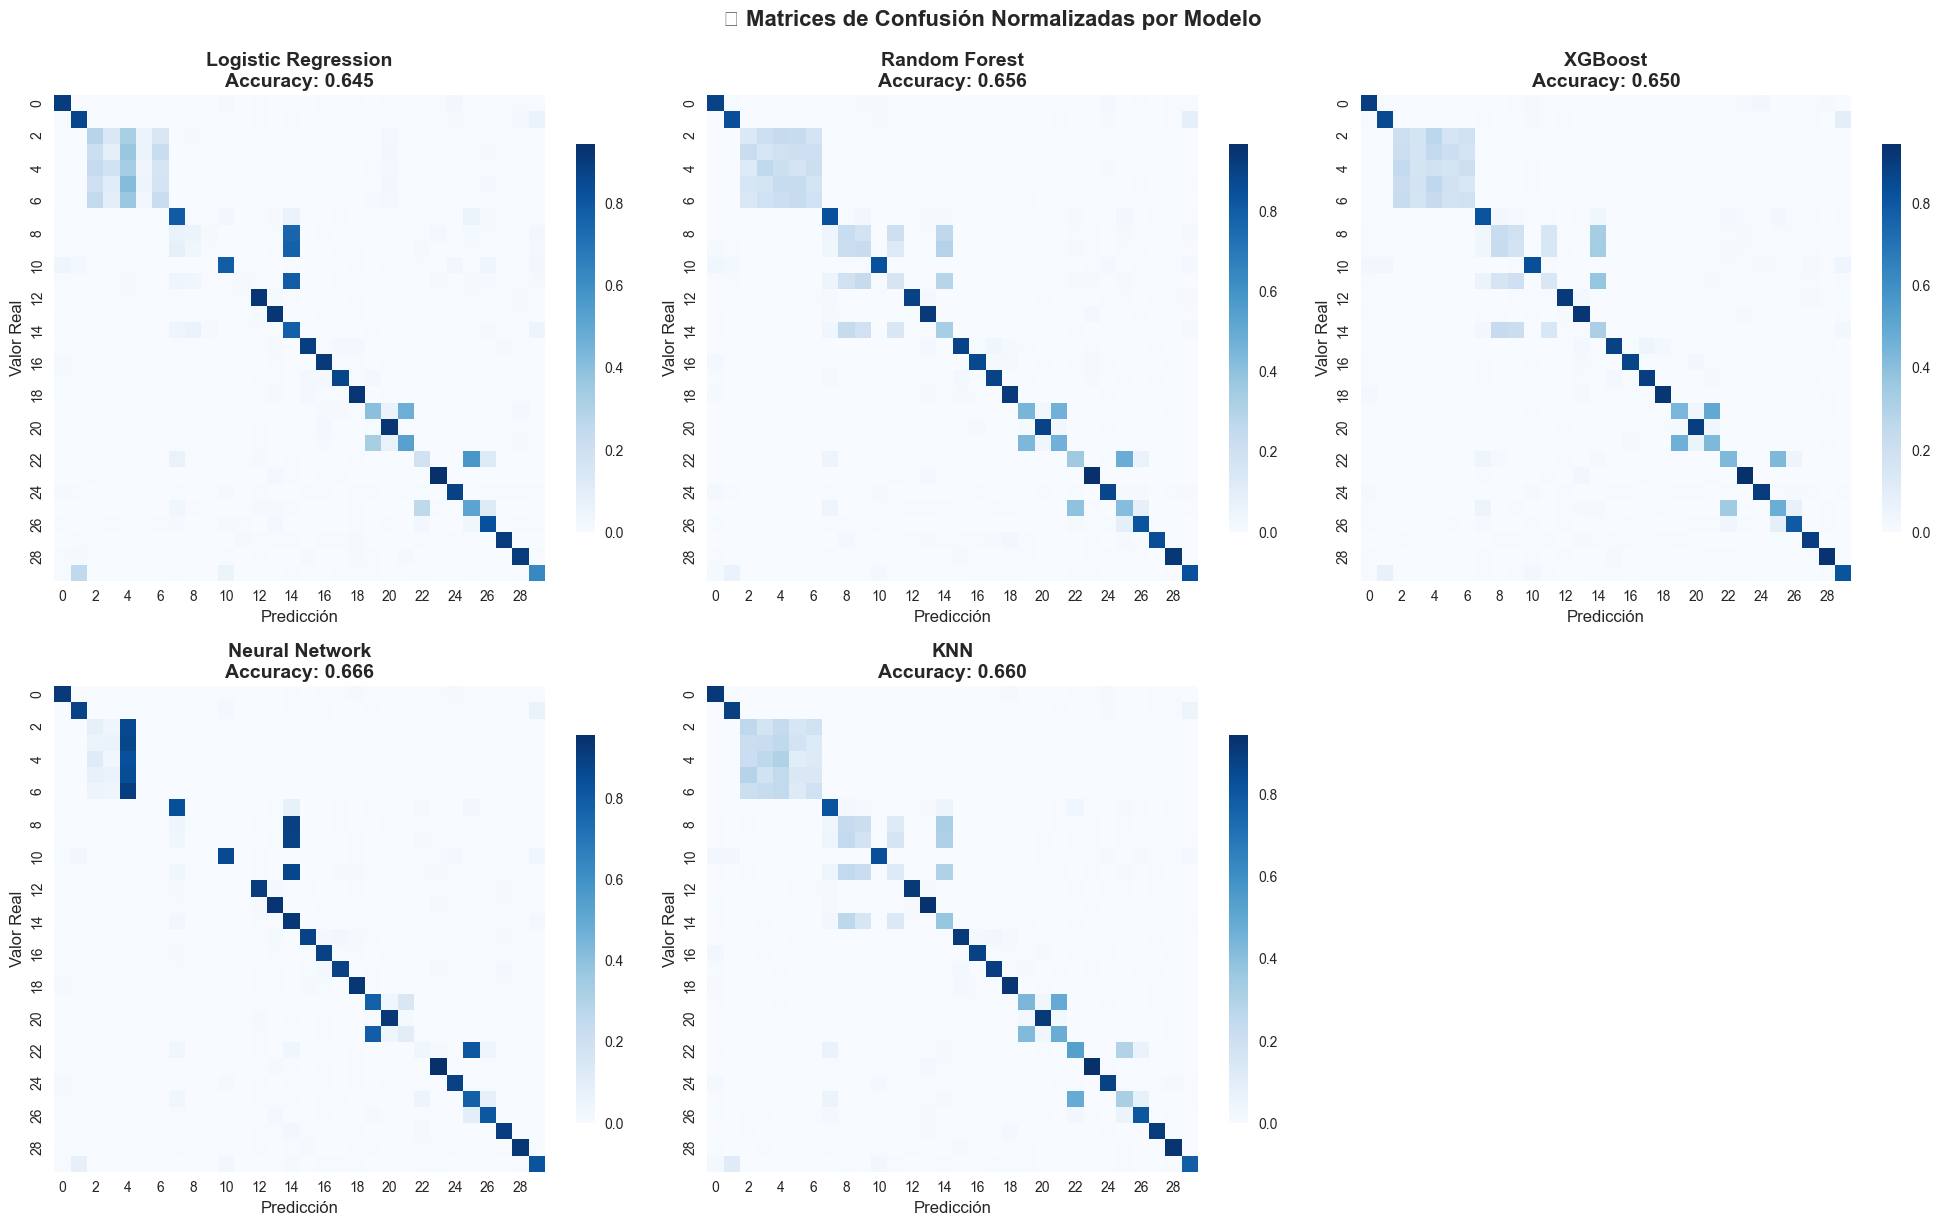

In [14]:
def plot_detailed_confusion_matrices(models, X_test, y_test, model_names):
    """Genera matrices de confusión detalladas para todos los modelos"""
    n_models = len(models)
    fig, axes = plt.subplots(2, 3, figsize=(20, 12))
    axes = axes.flatten()
    
    for i, (name, model) in enumerate(models.items()):
        # Obtener predicciones
        if hasattr(model, 'model'):
            if name == 'Neural Network':
                y_pred = model.predict(X_test)
            else:
                y_pred = model.model.predict(X_test)
        else:
            y_pred = model.predict(X_test)
        
        # Calcular matriz de confusión
        cm = confusion_matrix(y_test, y_pred)
        
        # Normalizar para mostrar porcentajes
        cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
        # Crear heatmap
        sns.heatmap(cm_normalized, annot=False, cmap='Blues', 
                   ax=axes[i], cbar_kws={'shrink': 0.8})
        axes[i].set_title(f'{name}\nAccuracy: {np.trace(cm)/np.sum(cm):.3f}', 
                         fontsize=14, fontweight='bold')
        axes[i].set_xlabel('Predicción', fontsize=12)
        axes[i].set_ylabel('Valor Real', fontsize=12)
    
    # Ocultar subplot vacío
    if n_models < 6:
        axes[5].set_visible(False)
    
    plt.tight_layout()
    plt.suptitle('🎯 Matrices de Confusión Normalizadas por Modelo', 
                 fontsize=16, fontweight='bold', y=1.02)
    plt.show()

# Generar matrices de confusión
plot_detailed_confusion_matrices(models, X_test, y_test, list(models.keys()))

### 📈 Curvas ROC Multiclase

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 309us/step


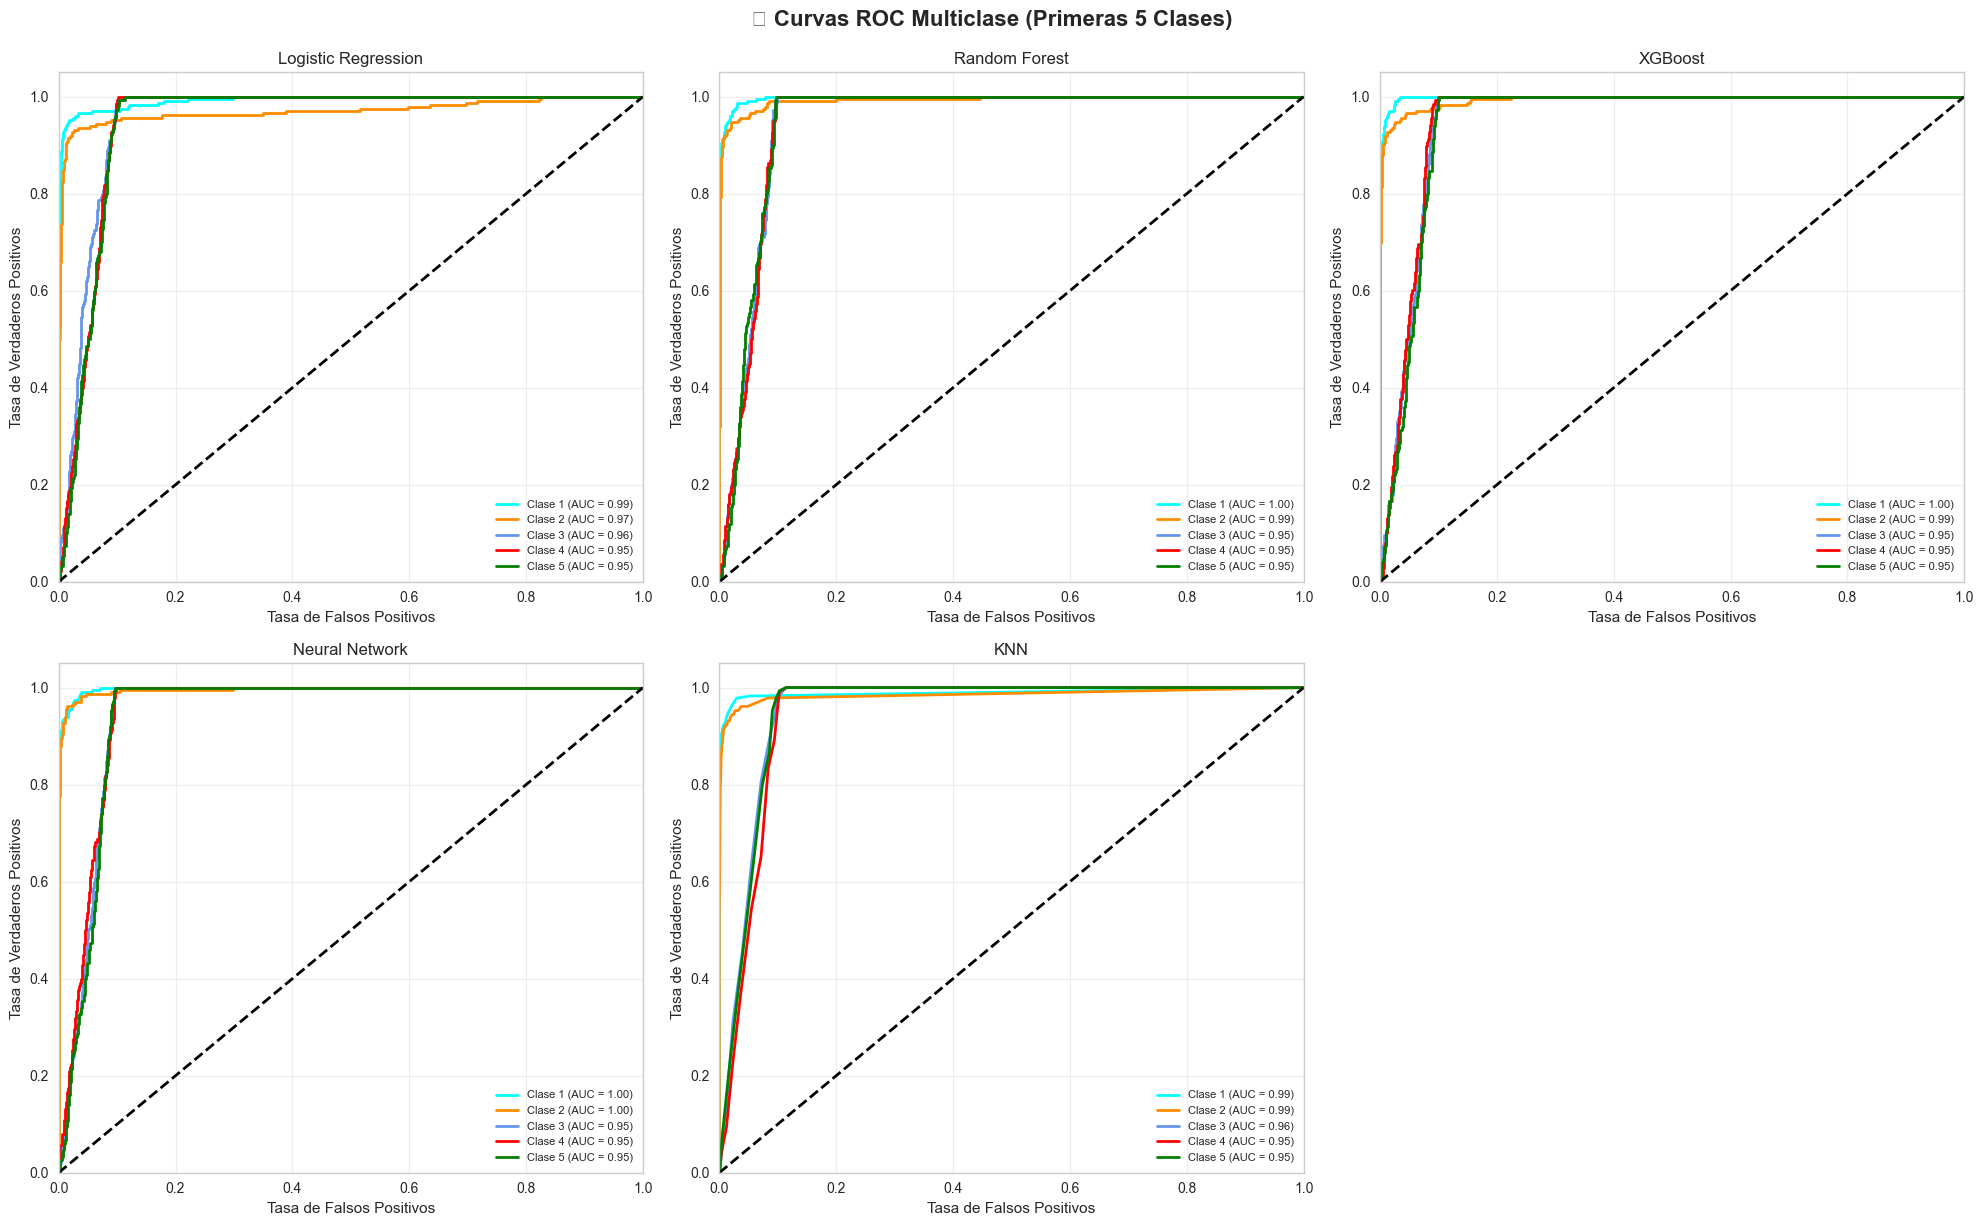

In [18]:
def plot_multiclass_roc_curves(models, X_test, y_test, n_classes=30):
    """Genera curvas ROC para clasificación multiclase"""
    # Binarizar las etiquetas
    y_test_bin = label_binarize(y_test, classes=range(n_classes))
    
    fig, axes = plt.subplots(2, 3, figsize=(20, 12))
    axes = axes.flatten()
    
    colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red', 'green'])
    
    for idx, (name, model) in enumerate(models.items()):
        # Obtener probabilidades de predicción
        if hasattr(model, 'model'):
            if name == 'Neural Network':
                y_score = model.predict_proba(X_test)
            elif hasattr(model.model, 'predict_proba'):
                y_score = model.model.predict_proba(X_test)
            else:
                # Para modelos sin predict_proba, usar decision_function
                try:
                    y_score = model.model.decision_function(X_test)
                except:
                    continue
        else:
            continue
        
        # Calcular ROC para cada clase
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        
        for i in range(min(5, n_classes)):  # Solo mostrar primeras 5 clases
            if y_score.shape[1] > i:
                fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
                roc_auc[i] = auc(fpr[i], tpr[i])
        
        # Plotear curvas ROC
        ax = axes[idx]
        for i, color in zip(range(min(5, n_classes)), colors):
            if i in fpr:
                ax.plot(fpr[i], tpr[i], color=color, lw=2,
                       label=f'Clase {i+1} (AUC = {roc_auc[i]:.2f})')
        
        ax.plot([0, 1], [0, 1], 'k--', lw=2)
        ax.set_xlim([0.0, 1.0])
        ax.set_ylim([0.0, 1.05])
        ax.set_xlabel('Tasa de Falsos Positivos')
        ax.set_ylabel('Tasa de Verdaderos Positivos')
        ax.set_title(f'{name}')
        ax.legend(loc="lower right", fontsize=8)
        ax.grid(True, alpha=0.3)
    
    # Ocultar subplot vacío
    if len(models) < 6:
        axes[5].set_visible(False)
    
    plt.tight_layout()
    plt.suptitle('📈 Curvas ROC Multiclase (Primeras 5 Clases)', 
                 fontsize=16, fontweight='bold', y=1.02)
    plt.show()

# Generar curvas ROC
plot_multiclass_roc_curves(models, X_test, y_test)

### 🎲 Distribución de Probabilidades de Predicción

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 310us/step
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 310us/step


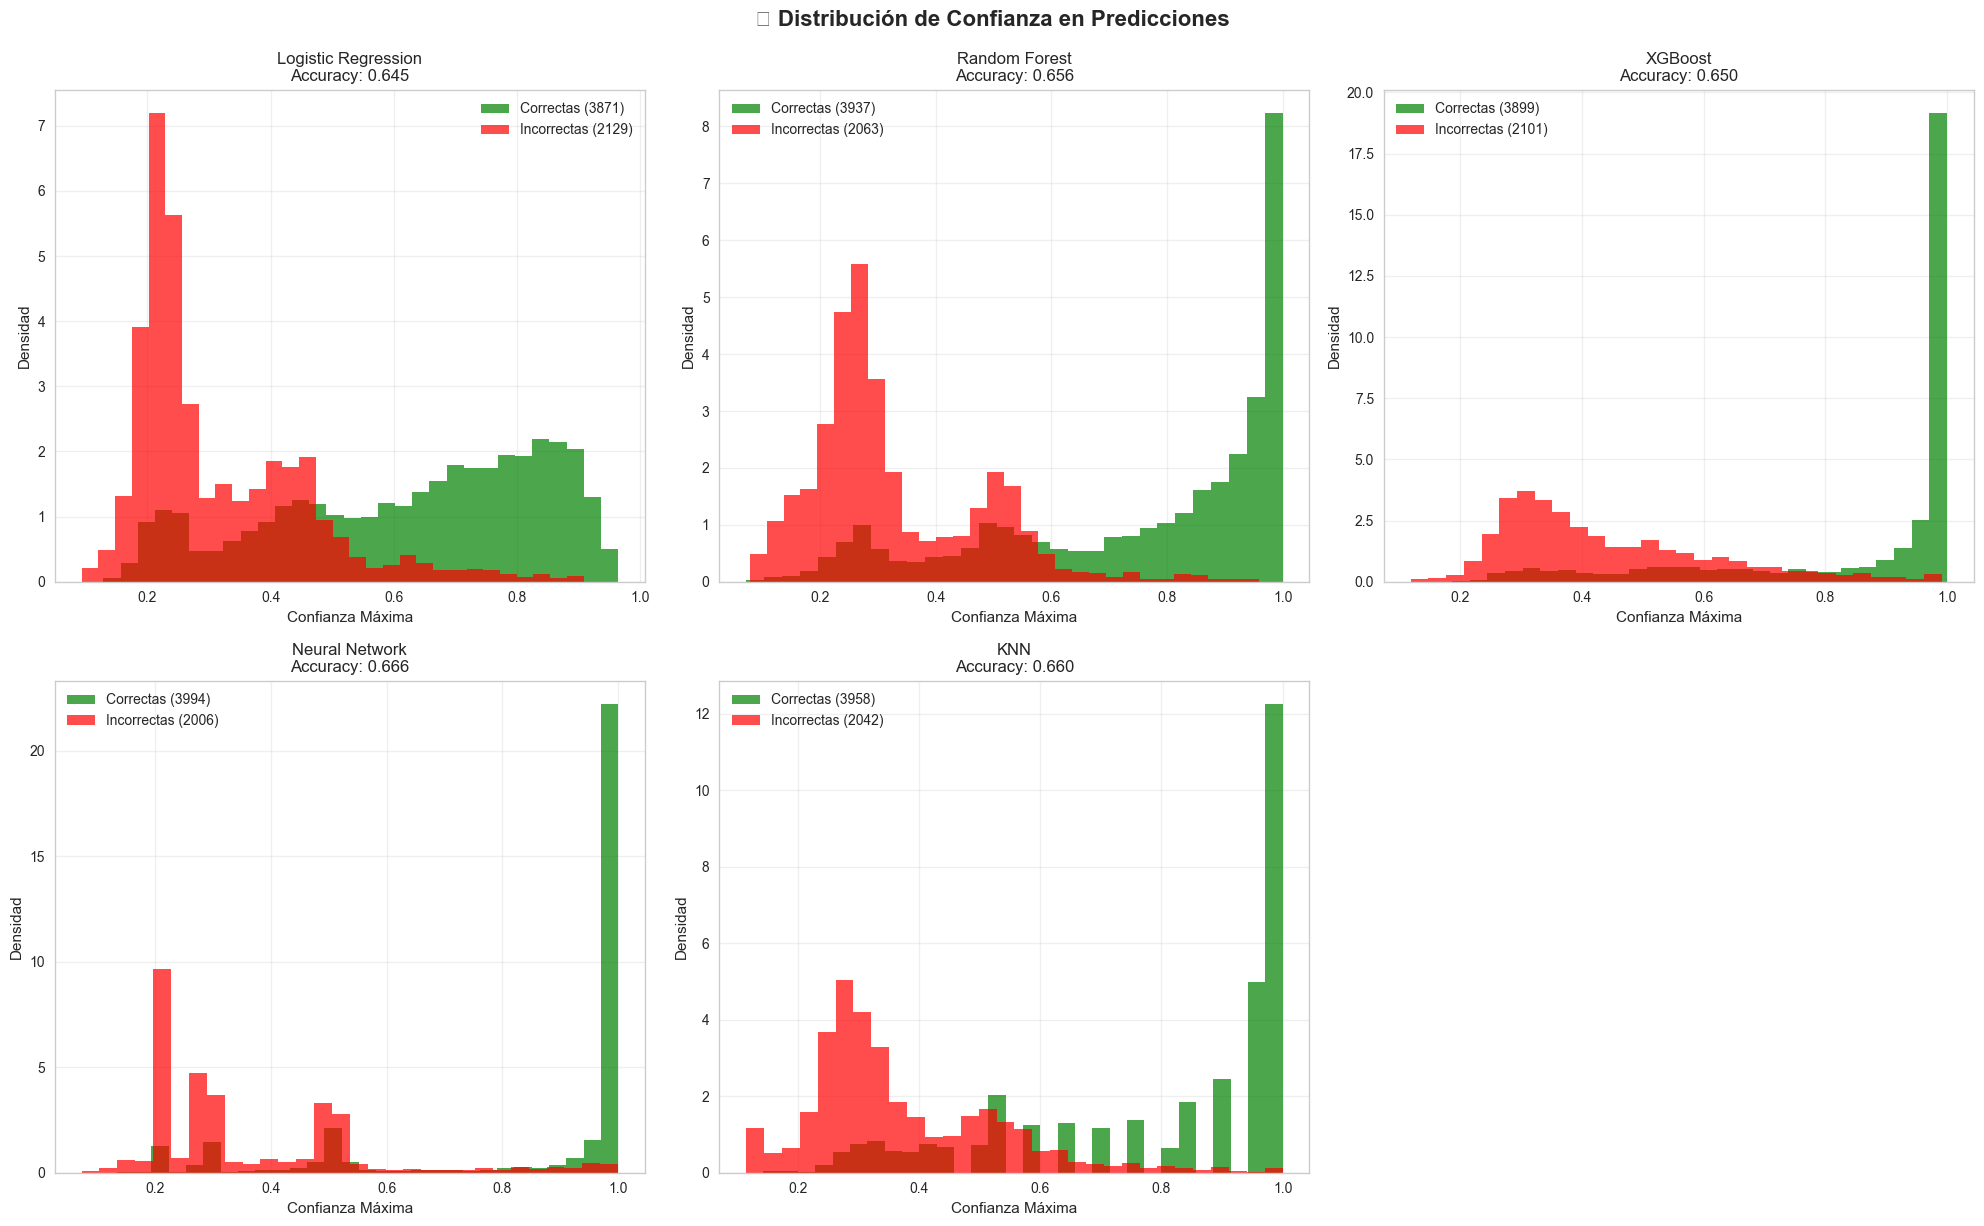

In [20]:
def plot_prediction_confidence_distribution(models, X_test, y_test):
    """Analiza la distribución de confianza en las predicciones"""
    fig, axes = plt.subplots(2, 3, figsize=(20, 12))
    axes = axes.flatten()
    
    for idx, (name, model) in enumerate(models.items()):
        # Obtener probabilidades máximas
        if hasattr(model, 'model'):
            if name == 'Neural Network':
                probs = model.predict_proba(X_test)
                max_probs = np.max(probs, axis=1)
                predictions = model.predict(X_test)
            elif hasattr(model.model, 'predict_proba'):
                probs = model.model.predict_proba(X_test)
                max_probs = np.max(probs, axis=1)
                predictions = model.model.predict(X_test)
            else:
                # Para modelos sin probabilidades, usar valores dummy
                predictions = model.model.predict(X_test)
                max_probs = np.ones(len(predictions)) * 0.5
        else:
            continue
        
        # Separar predicciones correctas e incorrectas
        correct_mask = predictions == y_test
        correct_probs = max_probs[correct_mask]
        incorrect_probs = max_probs[~correct_mask]
        
        ax = axes[idx]
        
        # Histogramas
        ax.hist(correct_probs, bins=30, alpha=0.7, color='green', 
               label=f'Correctas ({len(correct_probs)})', density=True)
        ax.hist(incorrect_probs, bins=30, alpha=0.7, color='red', 
               label=f'Incorrectas ({len(incorrect_probs)})', density=True)
        
        ax.set_xlabel('Confianza Máxima')
        ax.set_ylabel('Densidad')
        ax.set_title(f'{name}\nAccuracy: {len(correct_probs)/len(predictions):.3f}')
        ax.legend()
        ax.grid(True, alpha=0.3)
    
    # Ocultar subplot vacío
    if len(models) < 6:
        axes[5].set_visible(False)
    
    plt.tight_layout()
    plt.suptitle('🎲 Distribución de Confianza en Predicciones', 
                 fontsize=16, fontweight='bold', y=1.02)
    plt.show()

# Generar análisis de confianza
plot_prediction_confidence_distribution(models, X_test, y_test)

### 🔍 Análisis de Importancia de Características

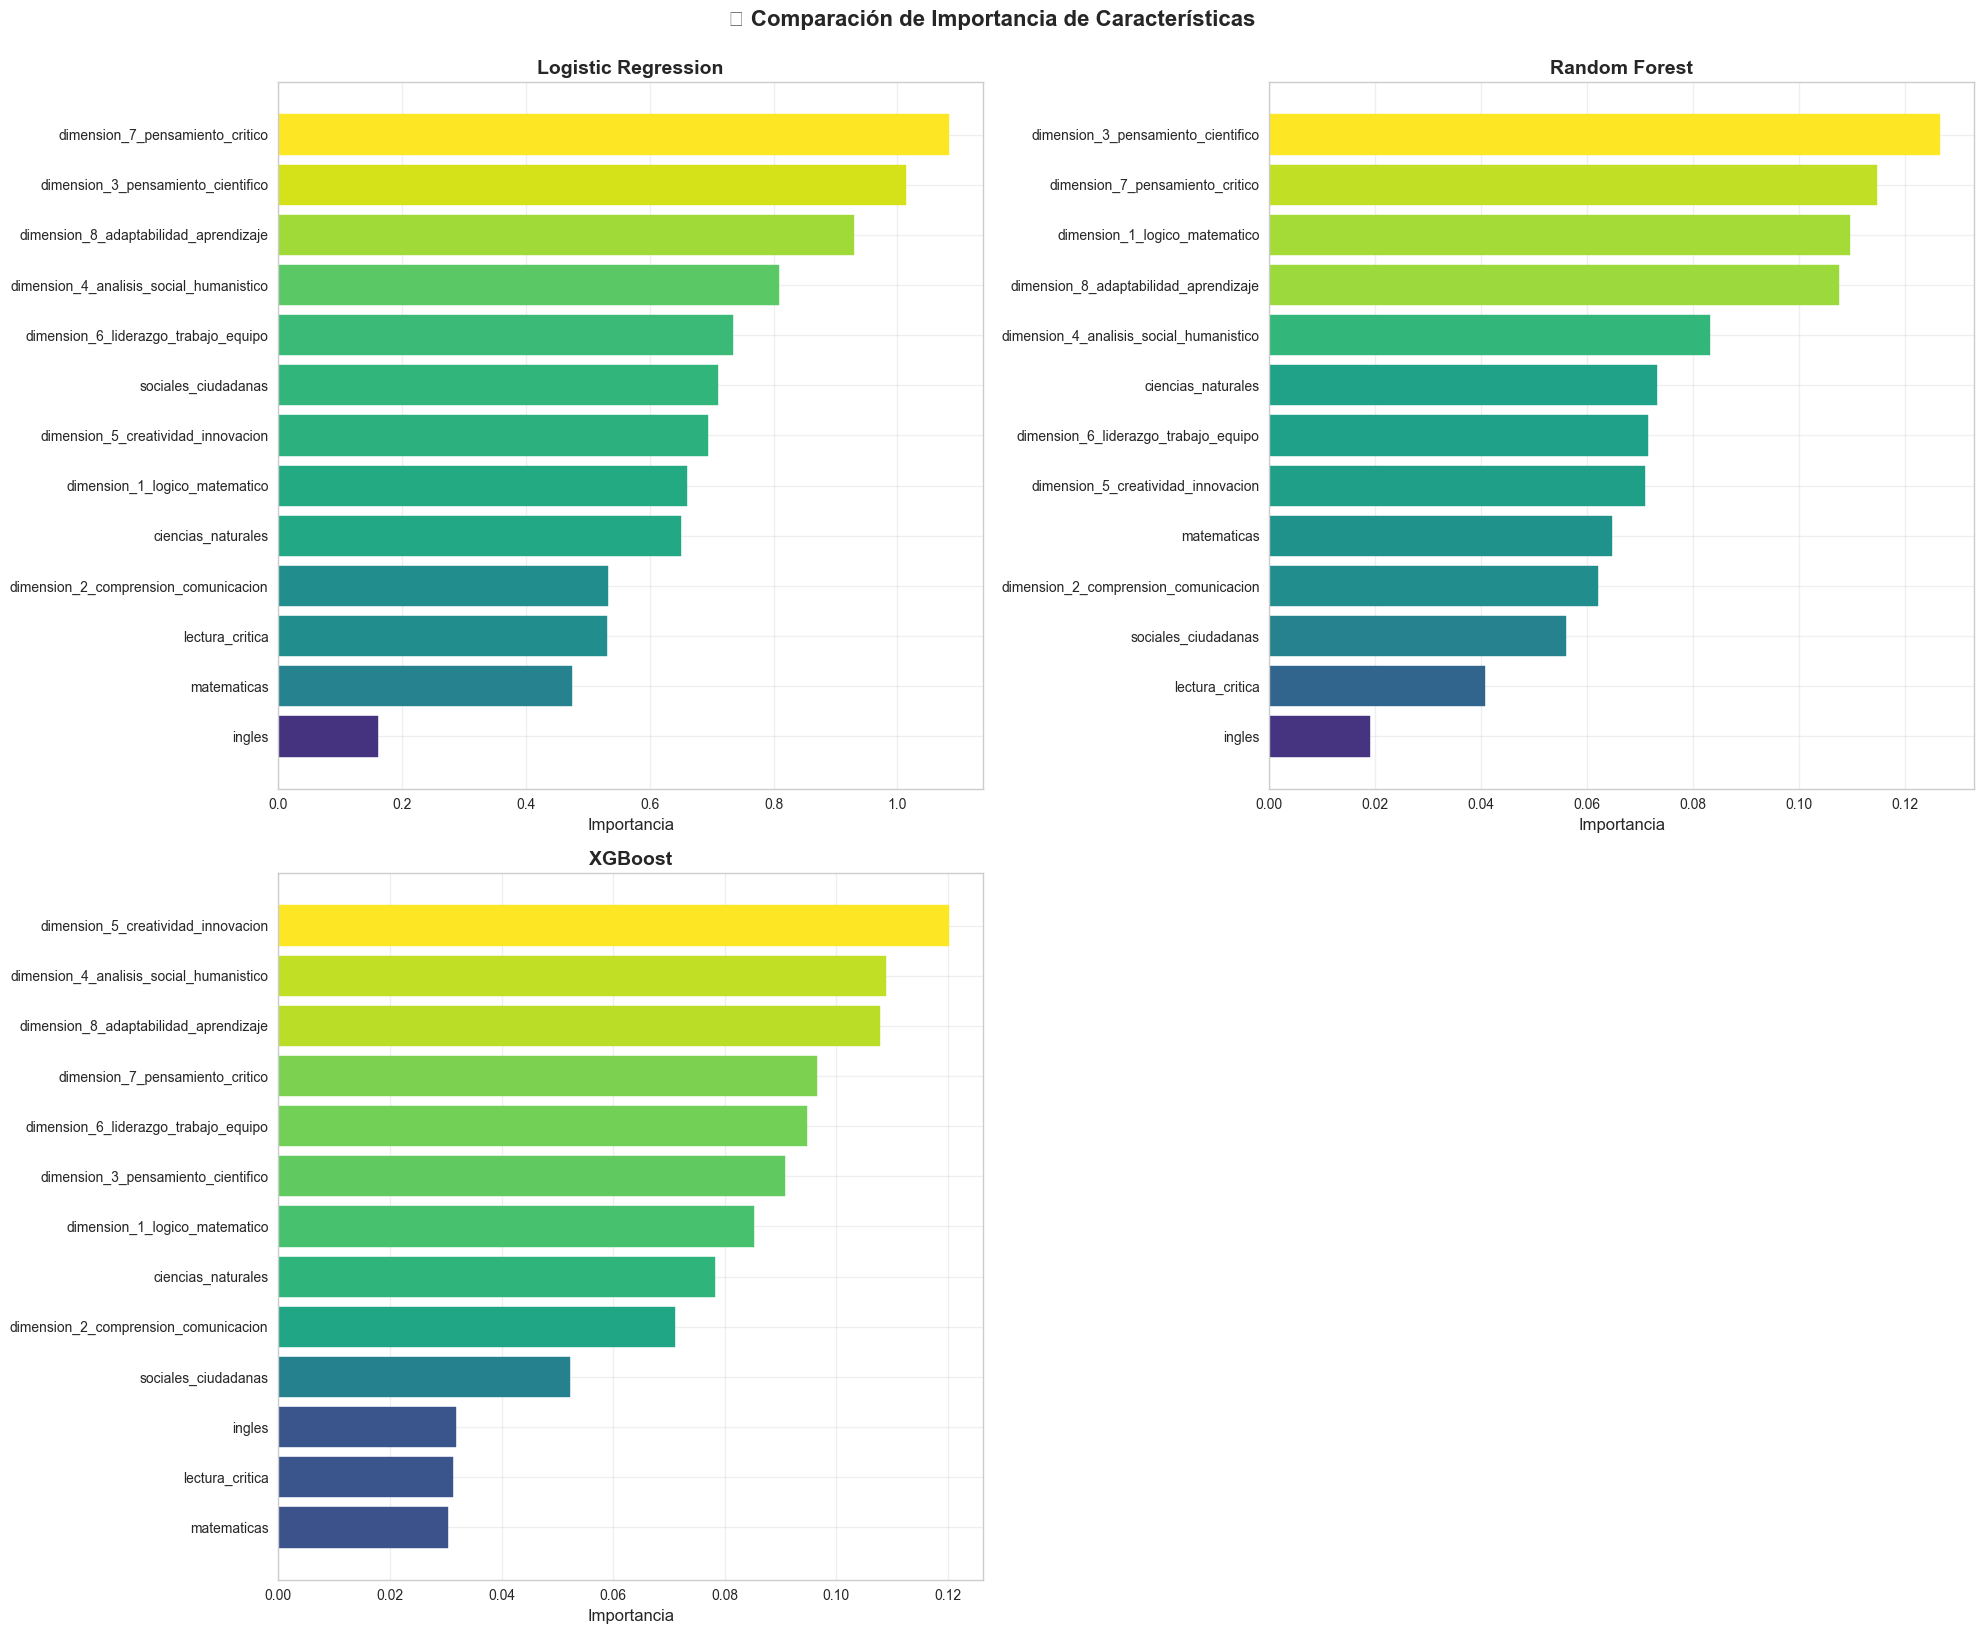

In [21]:
def plot_feature_importance_comparison(models, feature_names):
    """Compara la importancia de características entre modelos"""
    fig, axes = plt.subplots(2, 2, figsize=(20, 16))
    axes = axes.flatten()
    
    importance_data = {}
    
    for idx, (name, model) in enumerate(models.items()):
        if idx >= 4:  # Solo mostrar 4 modelos
            break
            
        importances = None
        
        # Obtener importancias según el tipo de modelo
        if hasattr(model, 'model'):
            if name == 'Random Forest' and hasattr(model.model, 'feature_importances_'):
                importances = model.model.feature_importances_
            elif name == 'XGBoost' and hasattr(model.model, 'feature_importances_'):
                importances = model.model.feature_importances_
            elif name == 'Logistic Regression' and hasattr(model.model, 'coef_'):
                # Para regresión logística, usar valor absoluto de coeficientes
                importances = np.mean(np.abs(model.model.coef_), axis=0)
        
        if importances is not None:
            importance_data[name] = importances
            
            # Crear DataFrame para facilitar el plotting
            df_importance = pd.DataFrame({
                'feature': feature_names,
                'importance': importances
            }).sort_values('importance', ascending=True)
            
            # Gráfico de barras horizontales
            ax = axes[idx]
            bars = ax.barh(df_importance['feature'], df_importance['importance'])
            
            # Colorear barras según importancia
            colors = plt.cm.viridis(df_importance['importance'] / df_importance['importance'].max())
            for bar, color in zip(bars, colors):
                bar.set_color(color)
            
            ax.set_title(f'{name}', fontsize=14, fontweight='bold')
            ax.set_xlabel('Importancia', fontsize=12)
            ax.grid(True, alpha=0.3)
            
            # Rotar etiquetas si son muy largas
            ax.tick_params(axis='y', labelsize=10)
    
    # Ocultar subplots vacíos
    for i in range(len(importance_data), 4):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    plt.suptitle('🔍 Comparación de Importancia de Características', 
                 fontsize=16, fontweight='bold', y=1.02)
    plt.show()
    
    return importance_data

# Generar análisis de importancia
feature_importance_data = plot_feature_importance_comparison(models, feature_names)

### 📊 Métricas Adicionales por Clase

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 319us/step


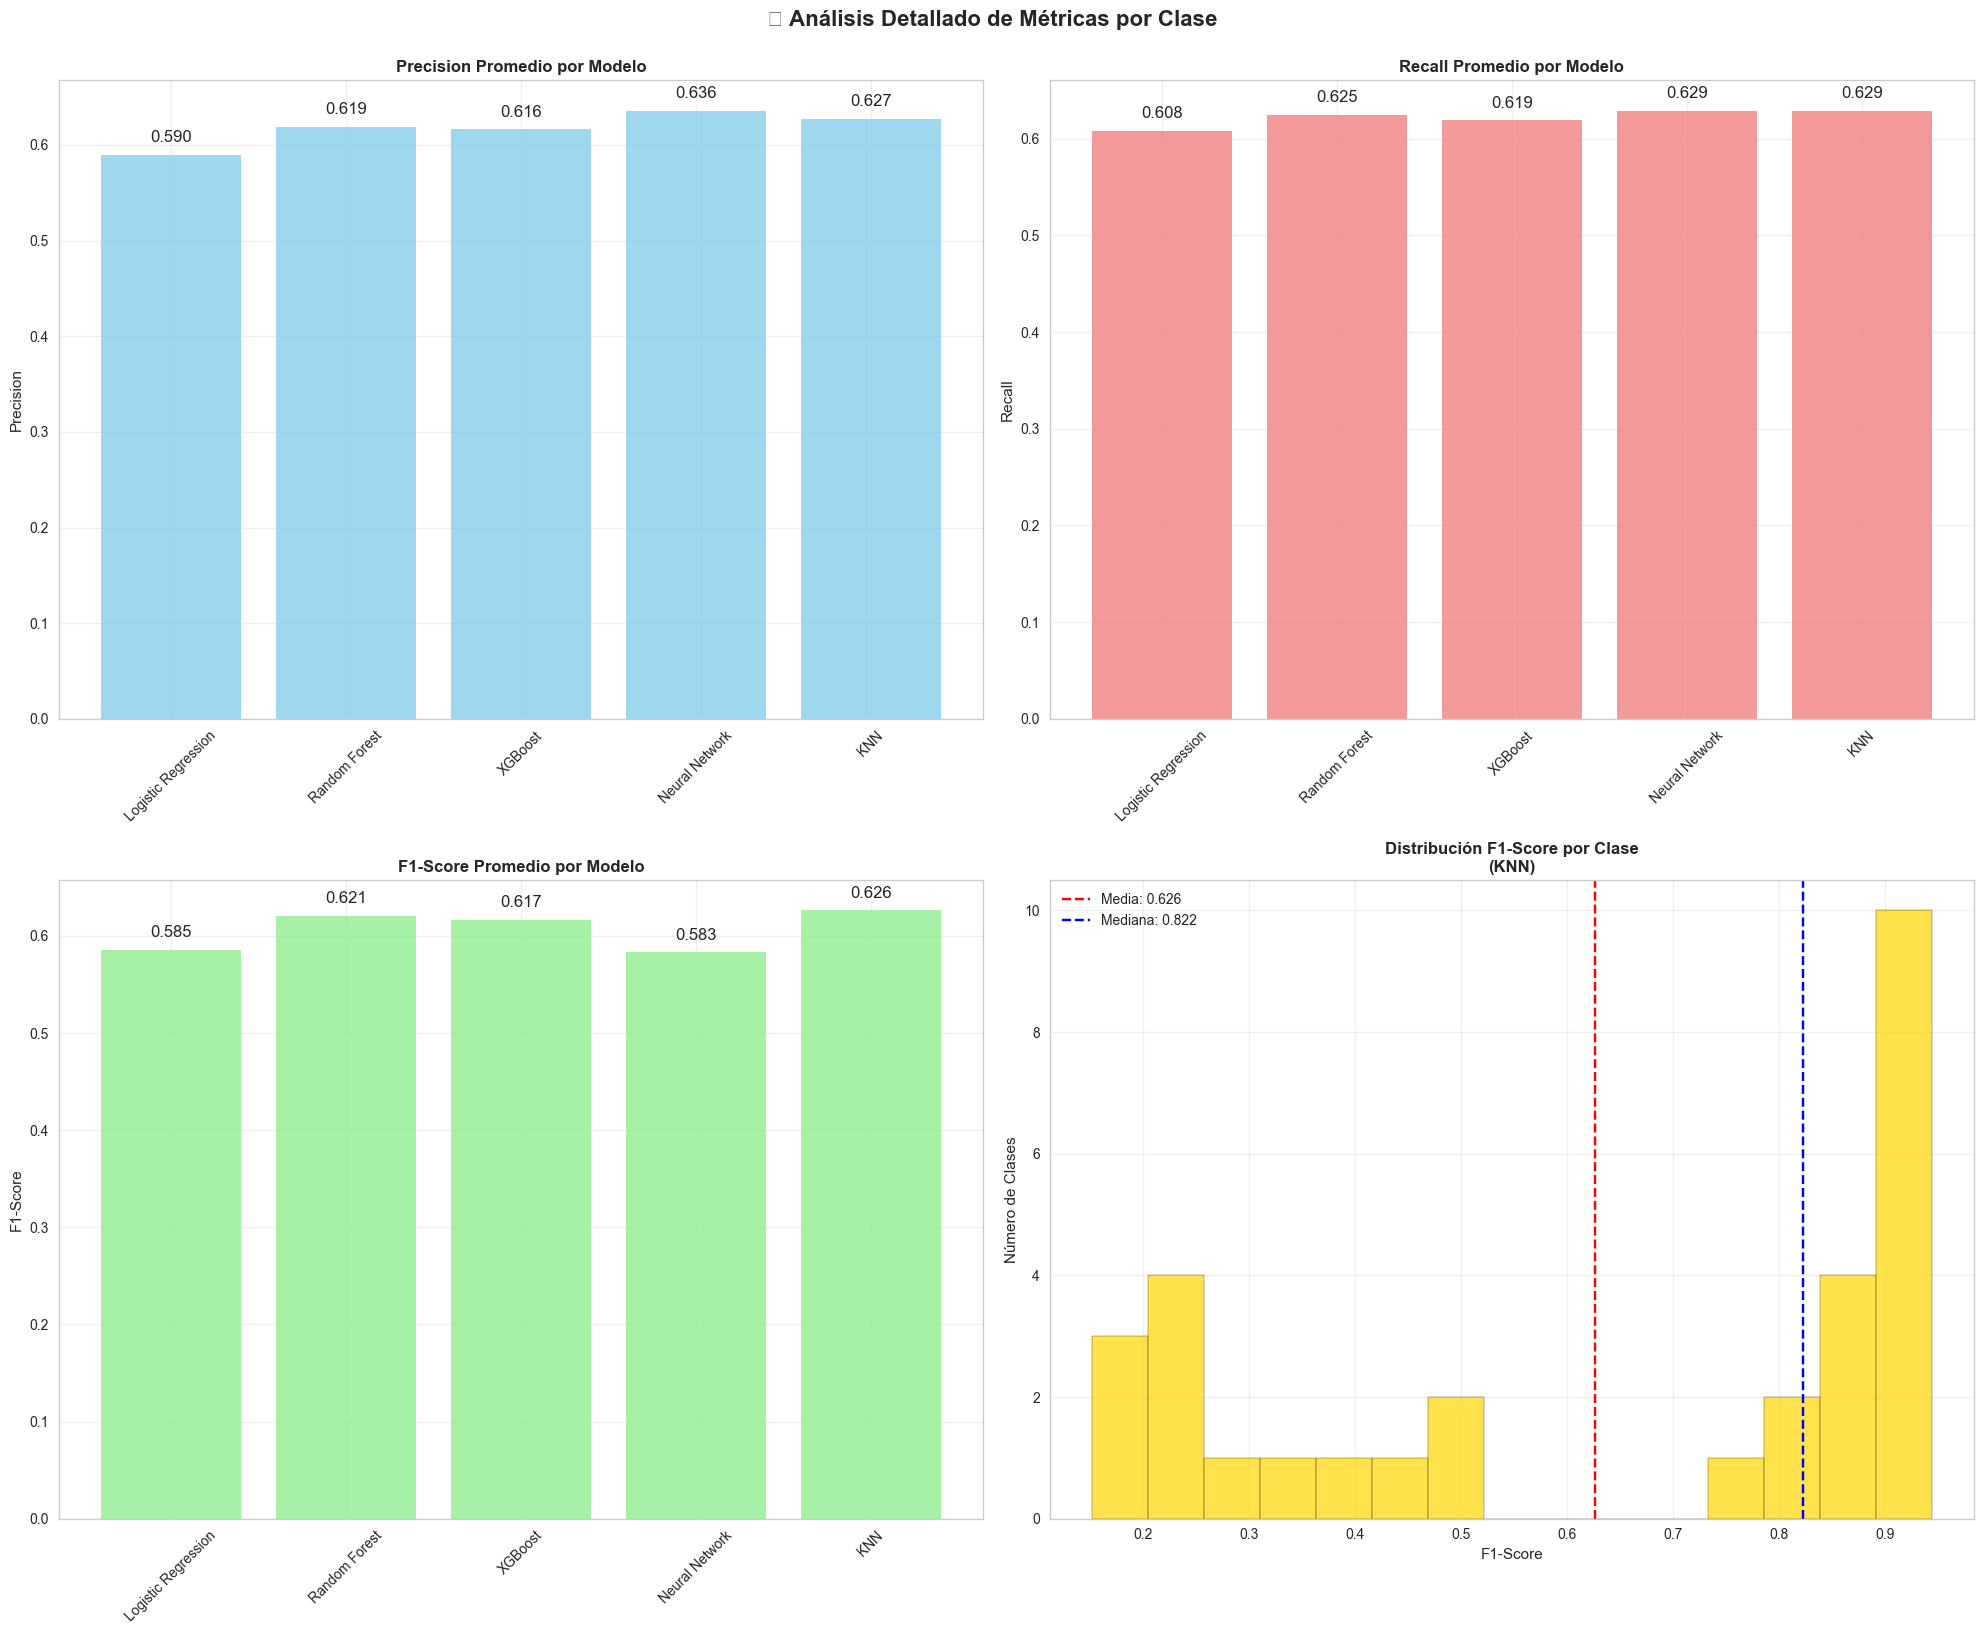

In [22]:
def plot_per_class_metrics(models, X_test, y_test, n_classes=30):
    """Analiza métricas detalladas por clase para cada modelo"""
    from sklearn.metrics import precision_recall_fscore_support, classification_report
    
    # Crear figura con subplots
    fig, axes = plt.subplots(2, 2, figsize=(20, 16))
    
    metrics_summary = {}
    
    for name, model in models.items():
        # Obtener predicciones
        if hasattr(model, 'model'):
            if name == 'Neural Network':
                y_pred = model.predict(X_test)
            else:
                y_pred = model.model.predict(X_test)
        else:
            y_pred = model.predict(X_test)
        
        # Calcular métricas por clase
        precision, recall, f1, support = precision_recall_fscore_support(
            y_test, y_pred, average=None, zero_division=0
        )
        
        metrics_summary[name] = {
            'precision': precision,
            'recall': recall,
            'f1': f1,
            'support': support
        }
    
    # Gráfico 1: Precision promedio por modelo
    ax1 = axes[0, 0]
    model_names = list(metrics_summary.keys())
    avg_precision = [np.mean(metrics_summary[name]['precision']) for name in model_names]
    
    bars1 = ax1.bar(model_names, avg_precision, color='skyblue', alpha=0.8)
    ax1.set_title('Precision Promedio por Modelo', fontweight='bold')
    ax1.set_ylabel('Precision')
    ax1.tick_params(axis='x', rotation=45)
    ax1.grid(True, alpha=0.3)
    
    # Agregar valores en las barras
    for bar, val in zip(bars1, avg_precision):
        ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
                f'{val:.3f}', ha='center', va='bottom')
    
    # Gráfico 2: Recall promedio por modelo
    ax2 = axes[0, 1]
    avg_recall = [np.mean(metrics_summary[name]['recall']) for name in model_names]
    
    bars2 = ax2.bar(model_names, avg_recall, color='lightcoral', alpha=0.8)
    ax2.set_title('Recall Promedio por Modelo', fontweight='bold')
    ax2.set_ylabel('Recall')
    ax2.tick_params(axis='x', rotation=45)
    ax2.grid(True, alpha=0.3)
    
    for bar, val in zip(bars2, avg_recall):
        ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
                f'{val:.3f}', ha='center', va='bottom')
    
    # Gráfico 3: F1-Score promedio por modelo
    ax3 = axes[1, 0]
    avg_f1 = [np.mean(metrics_summary[name]['f1']) for name in model_names]
    
    bars3 = ax3.bar(model_names, avg_f1, color='lightgreen', alpha=0.8)
    ax3.set_title('F1-Score Promedio por Modelo', fontweight='bold')
    ax3.set_ylabel('F1-Score')
    ax3.tick_params(axis='x', rotation=45)
    ax3.grid(True, alpha=0.3)
    
    for bar, val in zip(bars3, avg_f1):
        ax3.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
                f'{val:.3f}', ha='center', va='bottom')
    
    # Gráfico 4: Distribución de F1-Score por clase (mejor modelo)
    ax4 = axes[1, 1]
    best_model_name = model_names[np.argmax(avg_f1)]
    best_f1_scores = metrics_summary[best_model_name]['f1']
    
    ax4.hist(best_f1_scores, bins=15, color='gold', alpha=0.7, edgecolor='black')
    ax4.set_title(f'Distribución F1-Score por Clase\n({best_model_name})', fontweight='bold')
    ax4.set_xlabel('F1-Score')
    ax4.set_ylabel('Número de Clases')
    ax4.grid(True, alpha=0.3)
    
    # Agregar estadísticas
    ax4.axvline(np.mean(best_f1_scores), color='red', linestyle='--', 
               label=f'Media: {np.mean(best_f1_scores):.3f}')
    ax4.axvline(np.median(best_f1_scores), color='blue', linestyle='--', 
               label=f'Mediana: {np.median(best_f1_scores):.3f}')
    ax4.legend()
    
    plt.tight_layout()
    plt.suptitle('📊 Análisis Detallado de Métricas por Clase', 
                 fontsize=16, fontweight='bold', y=1.02)
    plt.show()
    
    return metrics_summary

# Generar análisis de métricas por clase
class_metrics = plot_per_class_metrics(models, X_test, y_test)